# TUGAS BERITA


Crawling berita menggunakan library BeautifulSoup. BeautifulSoup adalah pustaka Python yang digunakan untuk melakukan web scraping. Dalam konteks ini, BeautifulSoup akan digunakan untuk mengurai atau mem-parsing data HTML yang diambil dari situs web.

In [1]:
!pip install Sastrawi
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3799257/hoaks-kpu-tolak-pendaftaran-gibran-rakabuming-sebagai-bakal-cawapres-pada-25-oktober"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div' ,class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

#Case Folding
import re, string
article_text = re.sub(r'\d+', '', article_text)  # Menghapus angka
article_text = article_text.lower()  # Melakukan case folding

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
sentences = nltk.sent_tokenize(article_text)

# Cetak kalimat-kalimat
for sentence in sentences:
    print(sentence)



jakarta (antara/jacx) – ketua umum partai gerindra sekaligus bakal calon presiden prabowo subianto, secara resmi mengumumkan bahwa putra sulung presiden joko widodo, gibran rakabuming raka, telah dipilih sebagai bakal cawapres dari partai gerindra pada minggu, (//).
sebuah unggahan video di facebook berdurasi delapan menit menarasikan bahwa kpu menolak pendaftaran gibran karena dinyatakan cacat hukum.
dalam video tersebut, narator juga menyebutkan pakar hukum tata negara denny indrayana menyebut putusan mk tentang syarat capres-cawapres tidak bisa dijadikan landasan hukum gibran rakabuming raka dalam mendaftar pilpres .
berikut narasi dalam unggahan tersebut:
“news hari ini ~ dinyatakan ccat hukum kpu tolk pendaftan cawapres gibran-- - politik terbaru”

namun, benarkah kpu menolak pendaftaran gibran rakabuming sebagai bakal cawapres?
unggahan video hoaks yang menarasikan kpu tolak pendaftaran gibran rakabuming sebagai cawapres pada  oktober.
faktanya, belum ada informasi resmi mengen

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Preprocessing
# Lowercasing
article_text = article_text.lower()

# Cleaning
article_text = ''.join(e for e in article_text if (e.isalnum() or e.isspace() or e == '.'))

# Hapus Angka
article_text = ''.join([char for char in article_text if not char.isdigit()])

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(article_text)

# Tokenisasi setiap kalimat menjadi kata-kata
words = [nltk.word_tokenize(sentence) for sentence in sentences]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#custome stopword

from nltk.corpus import stopwords

# Mengambil daftar stopword bahasa Indonesia dari NLTK
stopwords_indonesia = set(stopwords.words("indonesian"))

# Sekarang, Anda memiliki daftar stopword yang telah diperbarui
print(stopwords_indonesia)

{'keinginan', 'mampu', 'diibaratkan', 'boleh', 'belakangan', 'diingatkan', 'guna', 'tanpa', 'lah', 'demikianlah', 'merasa', 'berada', 'kemungkinannya', 'justru', 'lanjut', 'sesaat', 'sedang', 'yakin', 'manakala', 'disebutkan', 'memungkinkan', 'berlainan', 'diantaranya', 'dikarenakan', 'memberi', 'semasih', 'mengerjakan', 'betulkah', 'tegas', 'mula', 'sesampai', 'terakhir', 'ada', 'berdatangan', 'tanya', 'percuma', 'sekecil', 'memperkirakan', 'benarlah', 'tengah', 'dipunyai', 'tentang', 'gunakan', 'melalui', 'untuk', 'kesampaian', 'soal', 'enggaknya', 'menjawab', 'ingat-ingat', 'sempat', 'sebagian', 'kira-kira', 'melakukan', 'mempersoalkan', 'nah', 'sepihak', 'jawaban', 'dijelaskan', 'sebegitu', 'setengah', 'nyaris', 'sinilah', 'mengakhiri', 'terhadap', 'dipergunakan', 'bersiap', 'ataukah', 'menanti', 'bukankah', 'selanjutnya', 'kebetulan', 'cara', 'menggunakan', 'tak', 'sekiranya', 'melihat', 'meski', 'empat', 'semampunya', 'akulah', 'bersama-sama', 'cukupkah', 'diberikannya', 'dimaksu

In [5]:
# Stopword Removal
stop_words = set(stopwords.words('indonesian'))
filtered_sentences = []


for sentence in words:
    filtered_sentence = [word for word in sentence if word.lower() not in stop_words]
    filtered_sentences.append(filtered_sentence)


# Cetak kalimat-kalimat yang telah diproses
for filtered_sentence in filtered_sentences:
    print(filtered_sentence)

# Tutup respons setelah digunakan
response.close()

['jakarta', 'antarajacx', 'ketua', 'partai', 'gerindra', 'calon', 'presiden', 'prabowo', 'subianto', 'resmi', 'mengumumkan', 'putra', 'sulung', 'presiden', 'joko', 'widodo', 'gibran', 'rakabuming', 'raka', 'dipilih', 'cawapres', 'partai', 'gerindra', 'minggu', '.']
['unggahan', 'video', 'facebook', 'berdurasi', 'delapan', 'menit', 'menarasikan', 'kpu', 'menolak', 'pendaftaran', 'gibran', 'dinyatakan', 'cacat', 'hukum', '.']
['video', 'narator', 'pakar', 'hukum', 'tata', 'negara', 'denny', 'indrayana', 'menyebut', 'putusan', 'mk', 'syarat', 'caprescawapres', 'dijadikan', 'landasan', 'hukum', 'gibran', 'rakabuming', 'raka', 'mendaftar', 'pilpres', '.']
['narasi', 'unggahan', 'news', 'dinyatakan', 'ccat', 'hukum', 'kpu', 'tolk', 'pendaftan', 'cawapres', 'gibran', 'politik', 'terbaru', 'kpu', 'menolak', 'pendaftaran', 'gibran', 'rakabuming', 'cawapres', 'unggahan', 'video', 'hoaks', 'menarasikan', 'kpu', 'tolak', 'pendaftaran', 'gibran', 'rakabuming', 'cawapres', 'oktober', '.']
['faktanya

##TF-IDF

Index dalam bentuk angka

In [6]:
# Create a DataFrame to store TF-IDF values
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_df = pd.DataFrame()

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sentences)

# Extract feature names (words) and TF-IDF values
feature_names = vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.toarray()

# Create a DataFrame from TF-IDF values
tfidf_df = pd.DataFrame(tfidf_values, columns=feature_names)

# Add a new column for sentences
tfidf_df['Kalimat'] = sentences

# Reorder columns to have 'Kalimat' at the beginning
tfidf_df = tfidf_df[['Kalimat'] + feature_names.tolist()]

# Display the resulting DataFrame
tfidf_df

,Kalimat,ada,anggotapewarta,anies,antara,antarajacx,anwar,apps,artikel,baca,...,tolak,tolk,tunggu,umum,unggahan,usman,video,videonya,widodo,yang
0,\n\r\njakarta antarajacx ketua umum partai ge...,0.000000,0.000000,0.000000,0.000000,0.170768,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.170768,0.000000,0.00000,0.000000,0.000000,0.170768,0.000000
1,sebuah unggahan video di facebook berdurasi de...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.240200,0.00000,0.190450,0.000000,0.000000,0.000000
2,dalam video tersebut narator juga menyebutkan ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.159031,0.000000,0.000000,0.000000
3,berikut narasi dalam unggahan tersebut\nnews h...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.129364,0.170521,0.000000,0.000000,0.292892,0.00000,0.116114,0.000000,0.000000,0.129364
4,faktanya belum ada informasi resmi mengenai ha...,0.327983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,facebook\n\npenjelasan\r\n\r\nberdasarkan pene...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.157237,0.000000,0.000000,0.175180
6,dalam artikel tersebut pakar hukum tata negara...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233158,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,denny beralasan ada konflik kepentingan ketua ...,0.293576,0.000000,0.000000,0.000000,0.000000,0.293576,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.34184,0.000000,0.000000,0.000000,0.000000
8,download apps cnn indonesia sekarangn anwar de...,0.000000,0.000000,0.000000,0.000000,0.000000,0.253644,0.295344,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.224059
9,selain itu kpu telah menerima berkas pendaftar...,0.000000,0.000000,0.000000,0.200209,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.233123,0.000000,0.000000


Index dalam bentuk kalimat 1,2 dst

In [7]:
# Create a DataFrame to store TF-IDF values
tfidf_df = pd.DataFrame()

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sentences)

# Extract feature names (words) and TF-IDF values
feature_names = vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.toarray()

# Create a DataFrame from TF-IDF values
tfidf_df = pd.DataFrame(tfidf_values, columns=feature_names)

# Add a new column for sentences
tfidf_df['Kalimat'] = sentences

# Reorder columns to have 'Kalimat' at the beginning
tfidf_df = tfidf_df[['Kalimat'] + feature_names.tolist()]

# Change the index to represent "Kalimat 1," "Kalimat 2," etc.
tfidf_df.index = [f'Kalimat {i+1}' for i in range(len(tfidf_df))]

# Display the resulting DataFrame
tfidf_df

,Kalimat,ada,anggotapewarta,anies,antara,antarajacx,anwar,apps,artikel,baca,...,tolak,tolk,tunggu,umum,unggahan,usman,video,videonya,widodo,yang
Kalimat 1,\n\r\njakarta antarajacx ketua umum partai ge...,0.000000,0.000000,0.000000,0.000000,0.170768,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.170768,0.000000,0.00000,0.000000,0.000000,0.170768,0.000000
Kalimat 2,sebuah unggahan video di facebook berdurasi de...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.240200,0.00000,0.190450,0.000000,0.000000,0.000000
Kalimat 3,dalam video tersebut narator juga menyebutkan ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.159031,0.000000,0.000000,0.000000
Kalimat 4,berikut narasi dalam unggahan tersebut\nnews h...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.129364,0.170521,0.000000,0.000000,0.292892,0.00000,0.116114,0.000000,0.000000,0.129364
Kalimat 5,faktanya belum ada informasi resmi mengenai ha...,0.327983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Kalimat 6,facebook\n\npenjelasan\r\n\r\nberdasarkan pene...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.157237,0.000000,0.000000,0.175180
Kalimat 7,dalam artikel tersebut pakar hukum tata negara...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233158,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Kalimat 8,denny beralasan ada konflik kepentingan ketua ...,0.293576,0.000000,0.000000,0.000000,0.000000,0.293576,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.34184,0.000000,0.000000,0.000000,0.000000
Kalimat 9,download apps cnn indonesia sekarangn anwar de...,0.000000,0.000000,0.000000,0.000000,0.000000,0.253644,0.295344,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.224059
Kalimat 10,selain itu kpu telah menerima berkas pendaftar...,0.000000,0.000000,0.000000,0.200209,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.233123,0.000000,0.000000


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")



Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0445


In [9]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0445
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.0369
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.1350
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0481
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0303
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0368
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0431
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0192
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.1336
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.1053
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.1464
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.1035
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.3387
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 6: 0.0901
Cosine Similarity antara Kalimat 2 dan Kalimat 7: 0.0731
Cosine Similarity antara Kalimat 2 dan Kalimat 8: 0.0000
Cosine Similarity antara Kal

In [10]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12
Kalimat 1,1.000000,0.044456,0.036870,0.134991,0.048101,0.030314,0.036809,0.043055,0.019228,0.133616,0.105267,0.146436
Kalimat 2,0.044456,1.000000,0.103484,0.338668,0.000000,0.090059,0.073074,0.000000,0.060925,0.110404,0.097675,0.056094
Kalimat 3,0.036870,0.103484,1.000000,0.145343,0.034004,0.285644,0.838308,0.158765,0.118589,0.071090,0.039325,0.054242
Kalimat 4,0.134991,0.338668,0.145343,1.000000,0.024828,0.122810,0.126666,0.022223,0.086586,0.150404,0.443498,0.313604
Kalimat 5,0.048101,0.000000,0.034004,0.024828,1.000000,0.033621,0.033947,0.096288,0.000000,0.000000,0.000000,0.000000
Kalimat 6,0.030314,0.090059,0.285644,0.122810,0.033621,1.000000,0.220495,0.126881,0.167552,0.070628,0.016304,0.062920
Kalimat 7,0.036809,0.073074,0.838308,0.126666,0.033947,0.220495,1.000000,0.158501,0.118391,0.070971,0.039259,0.031689
Kalimat 8,0.043055,0.000000,0.158765,0.022223,0.096288,0.126881,0.158501,1.000000,0.151445,0.058777,0.000000,0.000000
Kalimat 9,0.019228,0.060925,0.118589,0.086586,0.000000,0.167552,0.118391,0.151445,1.000000,0.026249,0.103257,0.051620
Kalimat 10,0.133616,0.110404,0.071090,0.150404,0.000000,0.070628,0.070971,0.058777,0.026249,1.000000,0.136683,0.196337


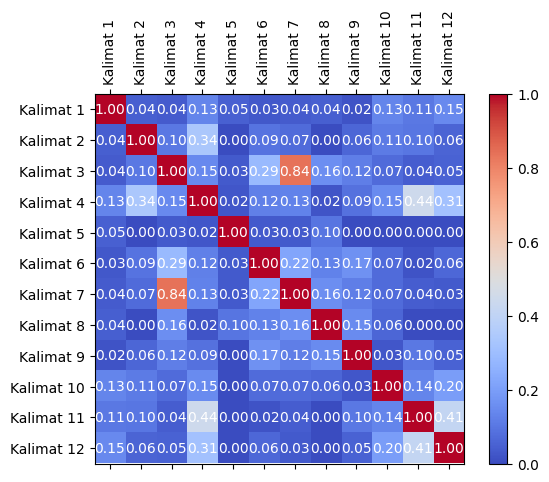

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


In [12]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")


Closeness Centrality of 

jakarta antarajacx  ketua umum partai gerindra sekaligus bakal calon presiden prabowo subianto secara resmi mengumumkan bahwa putra sulung presiden joko widodo gibran rakabuming raka telah dipilih sebagai bakal cawapres dari partai gerindra pada minggu .: 22.6943
Closeness Centrality of sebuah unggahan video di facebook berdurasi delapan menit menarasikan bahwa kpu menolak pendaftaran gibran karena dinyatakan cacat hukum.: 12.8101
Closeness Centrality of dalam video tersebut narator juga menyebutkan pakar hukum tata negara denny indrayana menyebut putusan mk tentang syarat caprescawapres tidak bisa dijadikan landasan hukum gibran rakabuming raka dalam mendaftar pilpres .: 17.3149
Closeness Centrality of berikut narasi dalam unggahan tersebut
news hari ini  dinyatakan ccat hukum kpu tolk pendaftan cawapres gibran  politik terbaru

namun benarkah kpu menolak pendaftaran gibran rakabuming sebagai bakal cawapres

 

unggahan video hoaks yang menarasikan kpu tolak 

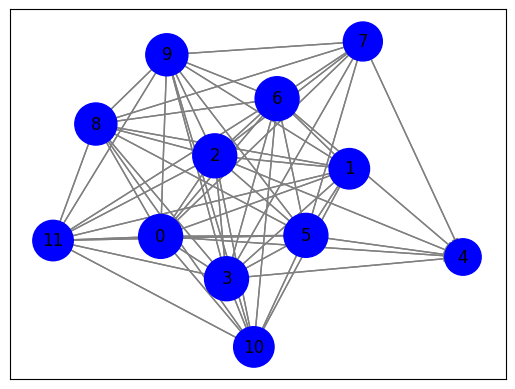

Closeness Centrality (Dari Tertinggi ke Terendah):
Node 0: Closeness Centrality 1.0000
Kalimat: 

jakarta antarajacx  ketua umum partai gerindra sekaligus bakal calon presiden prabowo subianto secara resmi mengumumkan bahwa putra sulung presiden joko widodo gibran rakabuming raka telah dipilih sebagai bakal cawapres dari partai gerindra pada minggu .

Node 2: Closeness Centrality 1.0000
Kalimat: dalam video tersebut narator juga menyebutkan pakar hukum tata negara denny indrayana menyebut putusan mk tentang syarat caprescawapres tidak bisa dijadikan landasan hukum gibran rakabuming raka dalam mendaftar pilpres .

Node 3: Closeness Centrality 1.0000
Kalimat: berikut narasi dalam unggahan tersebut
news hari ini  dinyatakan ccat hukum kpu tolk pendaftan cawapres gibran  politik terbaru

namun benarkah kpu menolak pendaftaran gibran rakabuming sebagai bakal cawapres

 

unggahan video hoaks yang menarasikan kpu tolak pendaftaran gibran rakabuming sebagai cawapres pada  oktober.

Node 5: Cl

In [13]:
#membuat grafik berarah (Directed Graph - DiGraph) yang merepresentasikan hubungan antara kalimat-kalimat dalam teks berdasarkan kemiripan (cosine similarity)
import networkx as nx
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality dari yang tertinggi hingga terendah
print("Closeness Centrality (Dari Tertinggi ke Terendah):")
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

for node, closeness in sorted_closeness:
    sentence = sentences[node]  # Akses kalimat yang sesuai dengan node
    print(f"Node {node}: Closeness Centrality {closeness:.4f}")
    print(f"Kalimat: {sentence}")
    print()




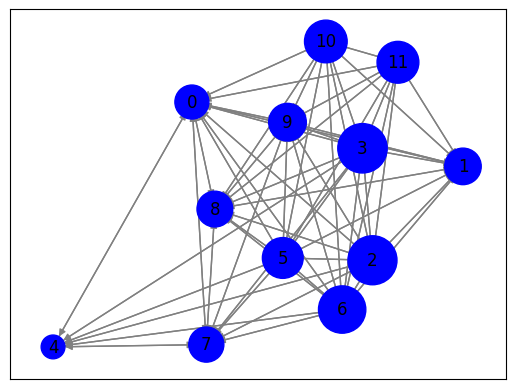

PageRank Centrality (Dari Tertinggi ke Terendah):
Node 3: PageRank Centrality 0.1264
Kalimat: berikut narasi dalam unggahan tersebut
news hari ini  dinyatakan ccat hukum kpu tolk pendaftan cawapres gibran  politik terbaru

namun benarkah kpu menolak pendaftaran gibran rakabuming sebagai bakal cawapres

 

unggahan video hoaks yang menarasikan kpu tolak pendaftaran gibran rakabuming sebagai cawapres pada  oktober.

Node 2: PageRank Centrality 0.1245
Kalimat: dalam video tersebut narator juga menyebutkan pakar hukum tata negara denny indrayana menyebut putusan mk tentang syarat caprescawapres tidak bisa dijadikan landasan hukum gibran rakabuming raka dalam mendaftar pilpres .

Node 6: PageRank Centrality 0.1161
Kalimat: dalam artikel tersebut pakar hukum tata negara denny indrayana menyebut putusan mahkamah konstitusi mk tentang syarat caprescawapres tidak bisa dijadikan landasan hukum gibran rakabuming raka dalam mendaftar pilpres .

Node 10: PageRank Centrality 0.0943
Kalimat: dengan d

In [14]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j, weight=similarity)  # Gunakan similarity sebagai weight

# Hitung PageRank centrality
pagerank_centrality = nx.pagerank(G, weight='weight')

# Visualisasi PageRank centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 10000 for v in pagerank_centrality.values()]  # Ubah ukuran node berdasarkan PageRank, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak PageRank centrality dari yang tertinggi hingga terendah
print("PageRank Centrality (Dari Tertinggi ke Terendah):")
sorted_pagerank = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)

for node, pagerank in sorted_pagerank:
    sentence = sentences[node]  # Akses kalimat yang sesuai dengan node
    print(f"Node {node}: PageRank Centrality {pagerank:.4f}")
    print(f"Kalimat: {sentence}")
    print()


In [15]:
import pandas as pd

# Hitung betweenness centrality
betweenness= nx.betweenness_centrality(G)

# Cetak DataFrame
print("DataFrame Betweenness Centrality:")
sorted_betweenness = dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))
for node, between in sorted_betweenness.items():
    print(f"Node {node}: {between:.4f}")

DataFrame Betweenness Centrality:
Node 0: 0.0248
Node 2: 0.0248
Node 3: 0.0248
Node 5: 0.0248
Node 6: 0.0248
Node 8: 0.0078
Node 9: 0.0078
Node 7: 0.0061
Node 1: 0.0000
Node 4: 0.0000
Node 10: 0.0000
Node 11: 0.0000


In [16]:
# Cetak betweenness
top_3_between = list(sorted_betweenness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
databw = {
    "Node": [node for node, _ in top_3_between],
    "Between": [between for _, between in top_3_between],
    "Kalimat": [sentences[node] for node, _ in top_3_between]
}

df_top_3bw = pd.DataFrame(databw)

# Cetak DataFrame
print("Tiga Node Between Teratas")
df_top_3bw

Tiga Node Between Teratas


,Node,Between,Kalimat
0,0,0.024762,\n\r\njakarta antarajacx ketua umum partai ge...
1,2,0.024762,dalam video tersebut narator juga menyebutkan ...
2,3,0.024762,berikut narasi dalam unggahan tersebut\nnews h...
